In [49]:
import pandas as pd

In [50]:
import numpy as np

In [51]:
df = pd.read_csv('../data/cafe_final.csv')


<ul>  Definições referente a Estação do Ano
<li> 1 =  verão - 21 de dezembro a 21 de março </li>
<li> 2 = outono - 21 de março a 21 de junho </li>
<li> 3 = inverno - 21 de junho a 23 de setembro </li>
<li> 4 = primavera - 23 de setembro a 21 de dezembro </li>
</ul> 

In [52]:
df.shape

(516, 5)

In [53]:
df.describe()

,valor,estacao_ano,valor_semestre,valor_bimestre
count,5.160000e+02,516.000000,8.600000e+01,2.580000e+02
mean,7.215016e+04,2.500000,4.329010e+05,1.443003e+05
std,3.688211e+05,1.119119,1.562326e+06,6.879693e+05
min,0.000000e+00,1.000000,0.000000e+00,0.000000e+00
25%,2.092925e+02,1.750000,1.204977e+03,4.271425e+02
50%,4.283950e+02,2.500000,2.594890e+03,8.614000e+02
75%,3.002007e+03,3.250000,2.061495e+04,5.969062e+03
max,4.056066e+06,4.000000,1.010121e+07,6.989920e+06


In [54]:
def index(data,y):
    ano = int(data.split('_')[0])
    mes = int(data.split('_')[1])
    i   = (ano - y)*12 + mes
    return i

In [55]:
index('2023_1',1981)

505

In [56]:
y = 1981
df['index']  = df['data'].apply(lambda x: index(x,y))

In [57]:
df.columns

Index(['data', 'valor', 'estacao_ano', 'valor_semestre', 'valor_bimestre',
       'index'],
      dtype='object')

In [58]:
df = df.sort_values(by='index')

In [59]:
df = df [['index','data','estacao_ano','valor','valor_bimestre','valor_semestre']]
df.head()

,index,data,estacao_ano,valor,valor_bimestre,valor_semestre
504,1,1981_1,1,6336.11,NaN,NaN
505,2,1981_2,1,6563.57,NaN,NaN
506,3,1981_3,1,6421.42,NaN,NaN
507,4,1981_4,2,6421.42,NaN,NaN
508,5,1981_5,2,6411.71,NaN,NaN


In [60]:
df['valor_bimestre'] = df['valor_bimestre'].fillna(0)
df['valor_semestre'] = df['valor_semestre'].fillna(0)

In [61]:
i = 0
soma_bim = 0
s2 = []
for index, row in df.iterrows():
    soma_bim = soma_bim + row['valor']
    s2.append(soma_bim)
    i = i + 1
    if i > 1 :
        i = 0
        soma_bim = 0  

In [62]:
i = 0
janela_bim = 0
j2 = []
valor_anterior = 0
for index, row in df.iterrows():
    janela_bim =  row['valor'] + valor_anterior
    valor_anterior = row['valor']
    j2.append(janela_bim)   

j2

In [63]:
i = 0
soma_sem = 0
s6 = []
valor_anterior = 0
for index, row in df.iterrows():
    soma_sem = soma_sem + row['valor']
    s6.append(soma_sem)
    i = i + 1
    if i > 5 :
        i = 0
        soma_sem = 0  

In [64]:
stack = []
stack.append(1)
stack.append(2)
stack.append(3)
stack.append(4)
stack.append(5)
stack

[1, 2, 3, 4, 5]

In [65]:
stack.pop()
stack

[1, 2, 3, 4]

In [66]:
stack.pop()
stack

[1, 2, 3]

In [67]:
from collections import deque
fila = deque(['A', 'B', 'C'])
fila.append('D')
head = fila.popleft()
print(head)
# deque(['B', 'C', 'D'])
print(fila)

A
deque(['B', 'C', 'D'])


In [68]:
len(fila)

3

In [69]:
i = 0
j6    = []
fila6 = deque()
for index, row in df.iterrows():
    valor = row['valor']
    fila6.append(valor)
    if len(fila6) > 6:
        fila6.popleft()
    s6 = 0
    for f in fila6:
        s6 = s6 + f
    j6.append(s6)   

In [70]:
df['valor_bimestre'] = s2; df['valor_semestre'] = s6; df['janela_bimestre'] = j2; df['janela_semestre'] = j6;

In [71]:
df.head()

,index,data,estacao_ano,valor,valor_bimestre,valor_semestre,janela_bimestre,janela_semestre
504,1,1981_1,1,6336.11,6336.11,0.0,6336.11,6336.11
505,2,1981_2,1,6563.57,12899.68,0.0,12899.68,12899.68
506,3,1981_3,1,6421.42,6421.42,0.0,12984.99,19321.10
507,4,1981_4,2,6421.42,12842.84,0.0,12842.84,25742.52
508,5,1981_5,2,6411.71,6411.71,0.0,12833.13,32154.23


In [72]:
def semestre(data):
    ano = int(data.split('_')[0])
    mes = int(data.split('_')[1])
    if i < 7:
        return 1
    else:
        return 2
    
def mes(data):
    ano = int(data.split('_')[0])
    mes = int(data.split('_')[1])
    return mes

In [73]:
df['semestre']  = df['data'].apply(lambda x: semestre(x))

In [74]:
df['mes']  = df['data'].apply(lambda x: mes(x))

In [75]:
df.head(10)

,index,data,estacao_ano,valor,valor_bimestre,valor_semestre,janela_bimestre,janela_semestre,semestre,mes
504,1,1981_1,1,6336.11,6336.11,0.0,6336.11,6336.11,1,1
505,2,1981_2,1,6563.57,12899.68,0.0,12899.68,12899.68,1,2
506,3,1981_3,1,6421.42,6421.42,0.0,12984.99,19321.10,1,3
507,4,1981_4,2,6421.42,12842.84,0.0,12842.84,25742.52,1,4
508,5,1981_5,2,6411.71,6411.71,0.0,12833.13,32154.23,1,5
509,6,1981_6,2,6207.21,12618.92,0.0,12618.92,38361.44,1,6
510,7,1981_7,3,6533.26,6533.26,0.0,12740.47,38558.59,1,7
511,8,1981_8,3,7455.29,13988.55,0.0,13988.55,39450.31,1,8
512,9,1981_9,3,7601.47,7601.47,0.0,15056.76,40630.36,1,9
513,10,1981_10,4,7814.22,15415.69,0.0,15415.69,42023.16,1,10


In [76]:
df.columns

Index(['index', 'data', 'estacao_ano', 'valor', 'valor_bimestre',
       'valor_semestre', 'janela_bimestre', 'janela_semestre', 'semestre',
       'mes'],
      dtype='object')

In [83]:
df= df[['index', 'data','mes','estacao_ano', 'semestre', 'valor_bimestre','valor_semestre', 
        'janela_bimestre', 'janela_semestre', 'valor']]

In [84]:
df.head(5)

,index,data,mes,estacao_ano,semestre,valor_bimestre,valor_semestre,janela_bimestre,janela_semestre,valor
504,1,1981_1,1,1,1,6336.11,0.0,6336.11,6336.11,6336.11
505,2,1981_2,2,1,1,12899.68,0.0,12899.68,12899.68,6563.57
506,3,1981_3,3,1,1,6421.42,0.0,12984.99,19321.10,6421.42
507,4,1981_4,4,2,1,12842.84,0.0,12842.84,25742.52,6421.42
508,5,1981_5,5,2,1,6411.71,0.0,12833.13,32154.23,6411.71


In [85]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

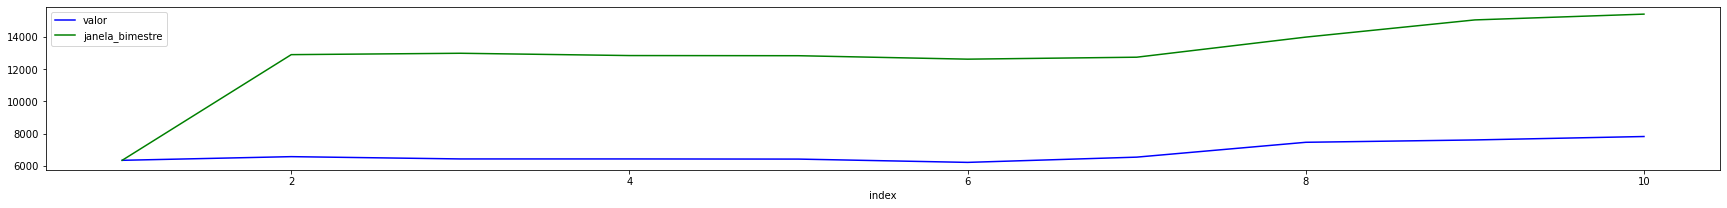

In [105]:
plt.rcParams["figure.figsize"] = (30,3)
ax1 = df.head(10).plot(kind='line', x='index', y='valor', color='b')    
ax2 = df.head(10).plot(kind='line', x='index', y='janela_bimestre', color='g', ax=ax1)

In [107]:
def sim_verao(v):
    if v == 1 :
        return 1
    else: 
        return 0
def sim_outono(v):
    if v == 2 :
        return 1
    else: 
        return 0
def sim_inverno(v):
    if v == 3 :
        return 1
    else: 
        return 0
def sim_primavera(v):
    if v == 4 :
        return 1
    else: 
        return 0

In [108]:
df['verao']     = df['estacao_ano'].apply(lambda x: sim_verao(x))
df['outono']    = df['estacao_ano'].apply(lambda x: sim_outono(x))
df['inverno']   = df['estacao_ano'].apply(lambda x: sim_inverno(x))
df['primavera'] = df['estacao_ano'].apply(lambda x: sim_primavera(x))

In [111]:
df.head(12)

,index,data,mes,estacao_ano,semestre,valor_bimestre,valor_semestre,janela_bimestre,janela_semestre,valor,verao,outono,inverno,primavera
504,1,1981_1,1,1,1,6336.11,0.0,6336.11,6336.11,6336.11,1,0,0,0
505,2,1981_2,2,1,1,12899.68,0.0,12899.68,12899.68,6563.57,1,0,0,0
506,3,1981_3,3,1,1,6421.42,0.0,12984.99,19321.10,6421.42,1,0,0,0
507,4,1981_4,4,2,1,12842.84,0.0,12842.84,25742.52,6421.42,0,1,0,0
508,5,1981_5,5,2,1,6411.71,0.0,12833.13,32154.23,6411.71,0,1,0,0
509,6,1981_6,6,2,1,12618.92,0.0,12618.92,38361.44,6207.21,0,1,0,0
510,7,1981_7,7,3,1,6533.26,0.0,12740.47,38558.59,6533.26,0,0,1,0
511,8,1981_8,8,3,1,13988.55,0.0,13988.55,39450.31,7455.29,0,0,1,0
512,9,1981_9,9,3,1,7601.47,0.0,15056.76,40630.36,7601.47,0,0,1,0
513,10,1981_10,10,4,1,15415.69,0.0,15415.69,42023.16,7814.22,0,0,0,1


In [ ]:
df.to_csv('../data/cafe_top.csv', index=None)